## Graphs Generation

### In this notebook I am generating the visualization of the experiments as follows
    1) Matrix Factorization Pre-Study
    2) Matrix Factorization Actual Study
    3) MLP Pre-Study
    4) MLP Actual Study

In [1]:
from csv import reader
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
XBIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=XBIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def get_list_of_content(path):
    """
    get content of log csv file
    """
    # read csv file as a list of lists
    with open(path, 'r') as read_obj:
        # pass the file object to reader() to get the reader object
        csv_reader = reader(read_obj)
        # Pass reader object to list() to get a list of lists
        list_of_rows = list(csv_reader)
        return list_of_rows
    
    

def get_file_names_in_folder(dir_path):
    # list to store files
    res = []

    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            res.append(path)
    return res

# Matrix Factorization Hyperparameters Visualization

#### 1) Regularization effect 

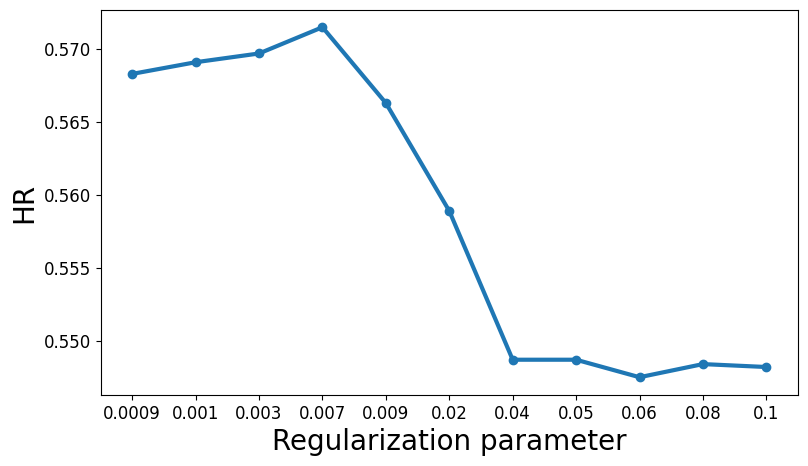

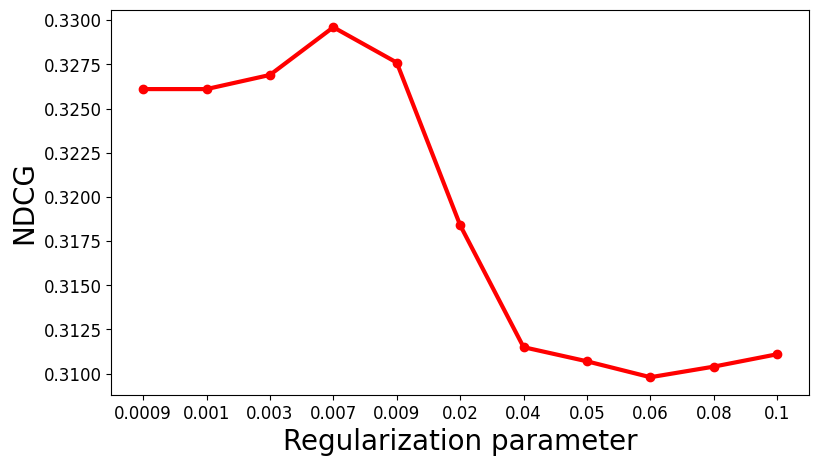

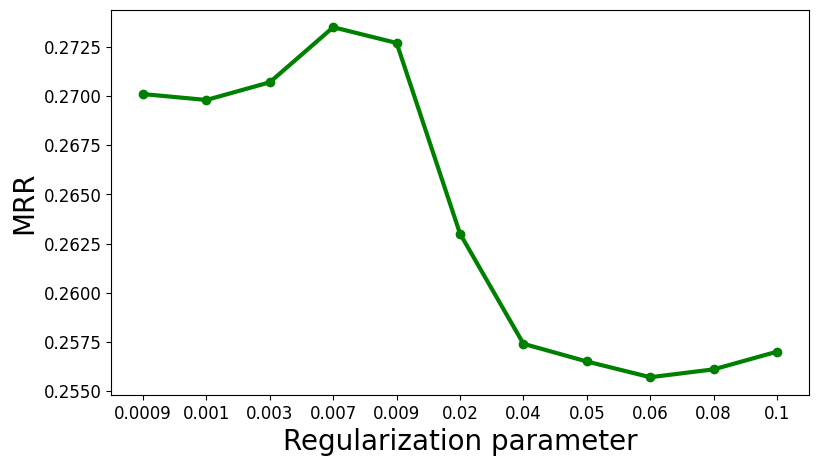

In [4]:

# generate graphs for Regularization
parent_dir = 'results/pre-study-mf/reg/'
list_of_files = get_file_names_in_folder(parent_dir)
#fig, ax = plt.subplots()
plt.figure(figsize=(9, 5))
hr_list = []
ndcg_list = []
mrr_list = []
for csv_file in list_of_files:
    
    complete_path = parent_dir + csv_file
    
    reg_list = get_list_of_content(complete_path)
    label = reg_list[0][1]
    
    #get last row of results
    hr = reg_list[-1][0]
    mrr =  reg_list[-1][2]
    
    ndcg_list.append([float(label), float(reg_list[-1][1])])
    #lr.append(label)
    
    hr_list.append([float(label), hr])
    mrr_list.append([float(label), mrr])

hr_list = sorted(hr_list)
x = [str(item[0]) for item in hr_list]
y = [float(format(float(item[1]),".4f")) for item in hr_list]


plt.xlabel('Regularization parameter')
plt.ylabel('HR')
plt.plot(x,y , marker="o", linewidth=3.0)

plt.show()


ndcg_list = sorted(ndcg_list)
x = [str(item[0]) for item in ndcg_list]
y = [float(format(float(item[1]),".4f")) for item in ndcg_list]

plt.figure(figsize=(9, 5))
plt.xlabel('Regularization parameter')
plt.ylabel('NDCG')
plt.plot(x,y , marker="o", color='r', linewidth=3.0)

plt.show()


mrr_list = sorted(mrr_list)
x = [str(item[0]) for item in mrr_list]
y = [float(format(float(item[1]),".4f")) for item in mrr_list]

plt.figure(figsize=(9, 5))
plt.xlabel('Regularization parameter')
plt.ylabel('MRR')
plt.plot(x,y , marker="o", color='g', linewidth=3.0)

plt.show()




#### 2) Learning rate effect 

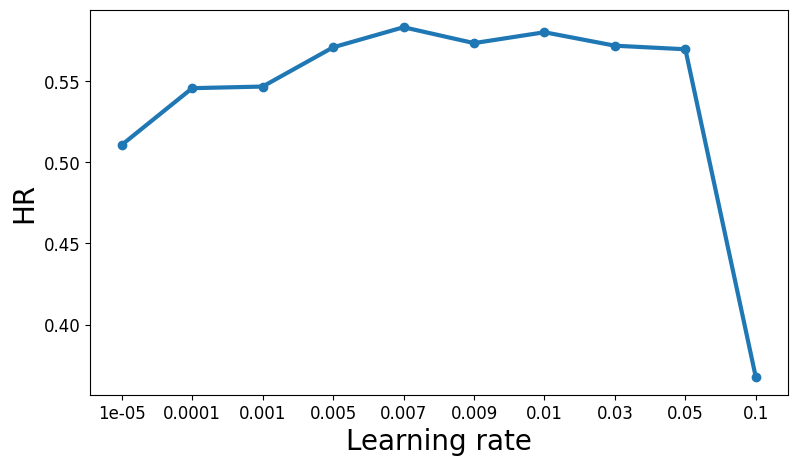

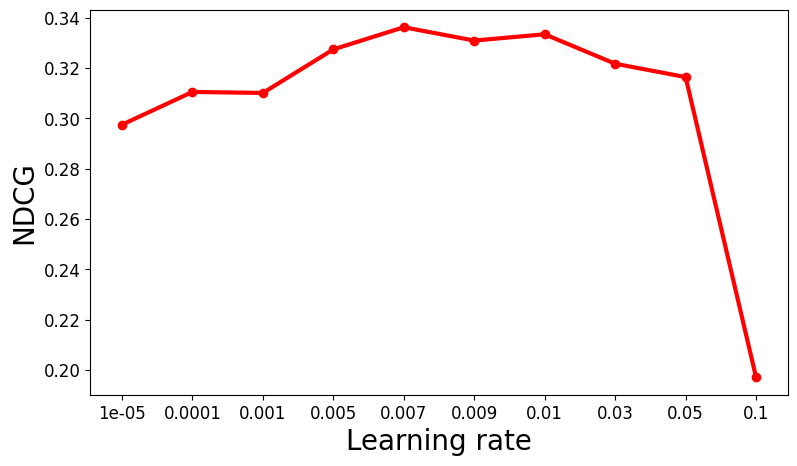

In [10]:
# generate graphs for Learning Rate

parent_dir = 'results/pre-study-mf/lr/'
list_of_files = get_file_names_in_folder(parent_dir)
#fig, ax = plt.subplots()
plt.figure(figsize=(9, 5))
hr_list = []
ndcg_list = []
for csv_file in list_of_files:
    
    complete_path = parent_dir + csv_file
    
    lr_list = get_list_of_content(complete_path)
    label = lr_list[0][5]
    
    hr = lr_list[-1][0]
    
    ndcg_list.append([float(label), float(lr_list[-1][-1])])

    
    hr_list.append([float(label), hr])

hr_list = sorted(hr_list)
x = [str(item[0]) for item in hr_list]
y = [float(format(float(item[1]),".4f")) for item in hr_list]


plt.xlabel('Learning rate')
plt.ylabel('HR')
plt.plot(x,y , marker="o", linewidth=3.0)

plt.show()


ndcg_list = sorted(ndcg_list)
x = [str(item[0]) for item in ndcg_list]
y = [float(format(float(item[1]),".4f")) for item in ndcg_list]

plt.figure(figsize=(9, 5))
plt.xlabel('Learning rate')
plt.ylabel('NDCG')
plt.plot(x,y , marker="o", color='r', linewidth=3.0)

plt.show()

#print(ndcg_list)

#### 3) Embedding Dim effect

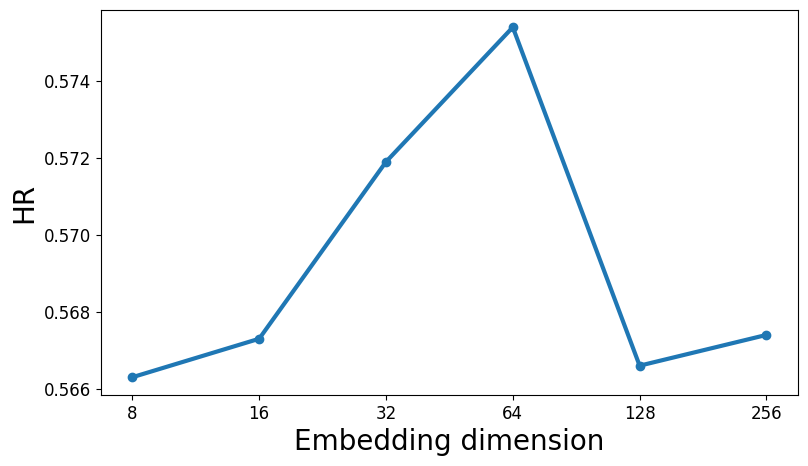

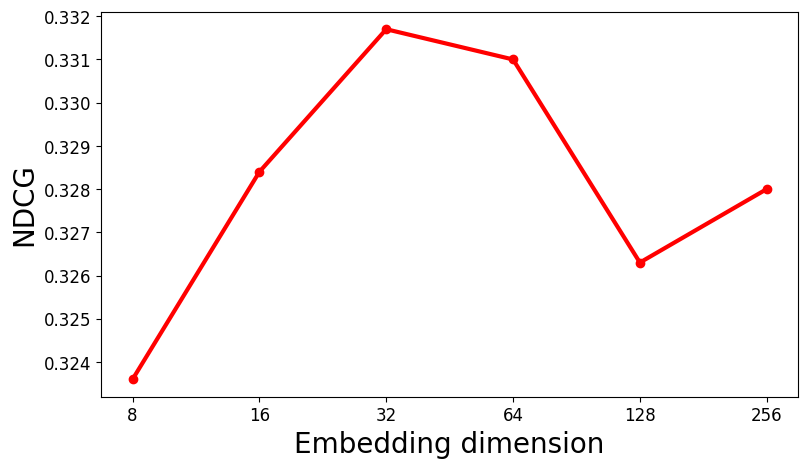

In [6]:
# generate graphs for Dim size

parent_dir = 'results/pre-study-mf/dim/'
list_of_files = get_file_names_in_folder(parent_dir)
#fig, ax = plt.subplots()
plt.figure(figsize=(9, 5))
hr_list = []
ndcg_list = []
for csv_file in list_of_files:
    
    complete_path = parent_dir + csv_file
    
    dim_list = get_list_of_content(complete_path)
    label = dim_list[0][0]
    
    hr = dim_list[-1][0]
    
    ndcg_list.append([int(label), float(dim_list[-1][-1])])
    
    hr_list.append([int(label), hr])

hr_list = sorted(hr_list)
x = [str(item[0]) for item in hr_list]
y = [float(format(float(item[1]),".4f")) for item in hr_list]


plt.xlabel('Embedding dimension')
plt.ylabel('HR')
plt.plot(x,y , marker="o", linewidth=3.0)

plt.show()


ndcg_list = sorted(ndcg_list)
x = [str(item[0]) for item in ndcg_list]
y = [float(format(float(item[1]),".4f")) for item in ndcg_list]

plt.figure(figsize=(9, 5))
plt.xlabel('Embedding dimension')
plt.ylabel('NDCG')
plt.plot(x,y , marker="o", color='r', linewidth=3.0)

plt.show()

#print(ndcg_list)

#### 4) STD effect

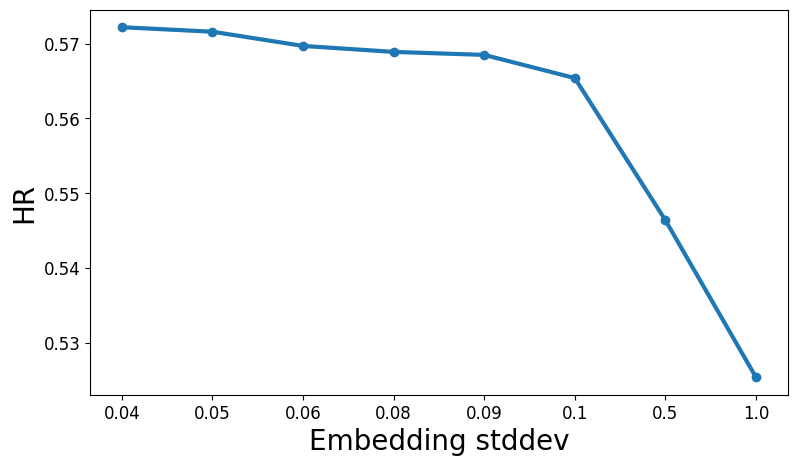

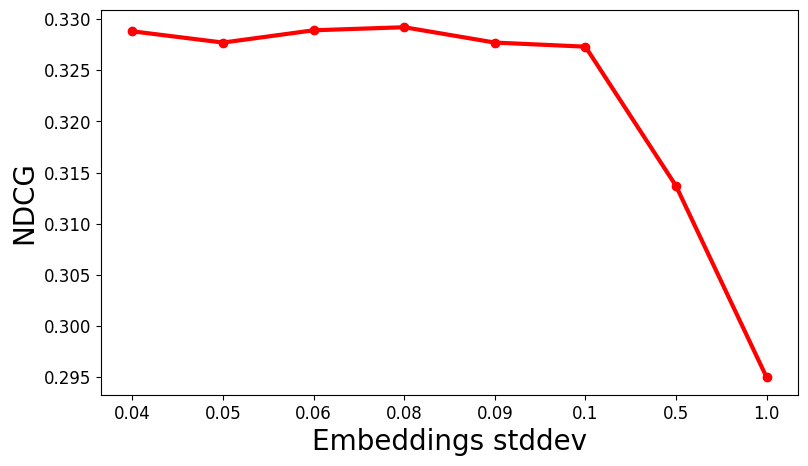

In [7]:
# generate graphs for std 

parent_dir = 'results/pre-study-mf/std/'
list_of_files = get_file_names_in_folder(parent_dir)
#fig, ax = plt.subplots()
plt.figure(figsize=(9, 5))
hr_list = []
ndcg_list = []
for csv_file in list_of_files:
    
    complete_path = parent_dir + csv_file
    
    std_list = get_list_of_content(complete_path)
    label = std_list[0][2]
    
    hr = std_list[-1][0]
    
    ndcg_list.append([float(label), float(std_list[-1][-1])])
   
    hr_list.append([float(label), hr])

hr_list = sorted(hr_list)
x = [str(item[0]) for item in hr_list]
y = [float(format(float(item[1]),".4f")) for item in hr_list]


plt.xlabel('Embedding stddev')
plt.ylabel('HR')
plt.plot(x,y , marker="o", linewidth=3.0)


plt.show()


ndcg_list = sorted(ndcg_list)
x = [str(item[0]) for item in ndcg_list]
y = [float(format(float(item[1]),".4f")) for item in ndcg_list]

plt.figure(figsize=(9, 5))
plt.xlabel('Embeddings stddev')
plt.ylabel('NDCG')
plt.plot(x,y , marker="o", color='r', linewidth=3.0)

plt.show()

#print(ndcg_list)

# Matrix Factorization - Full training graphs

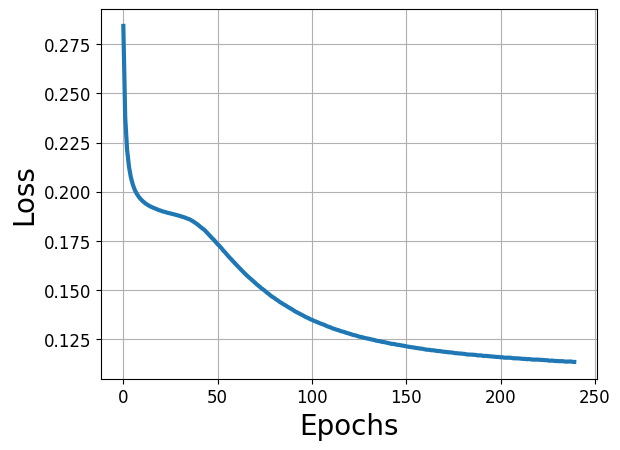

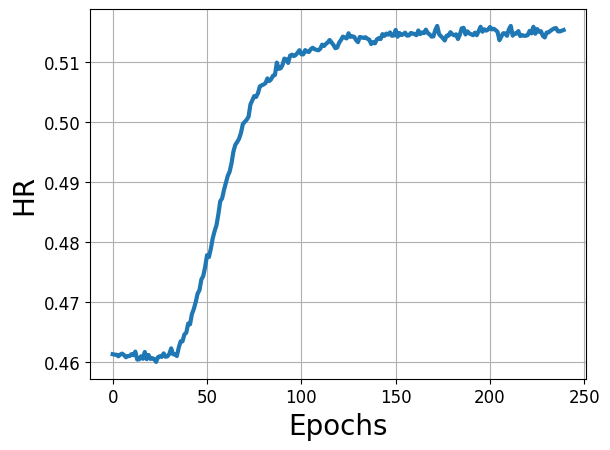

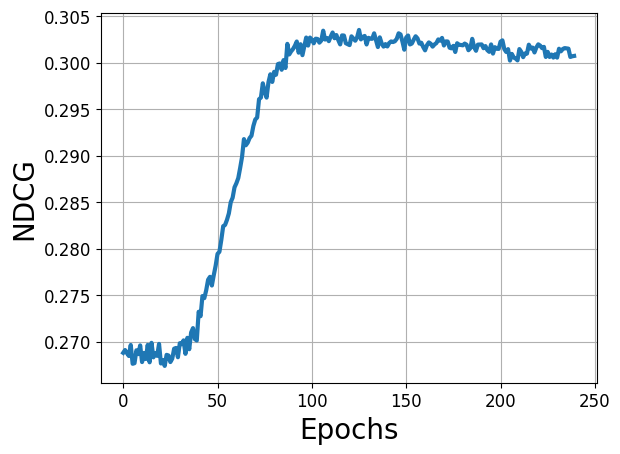

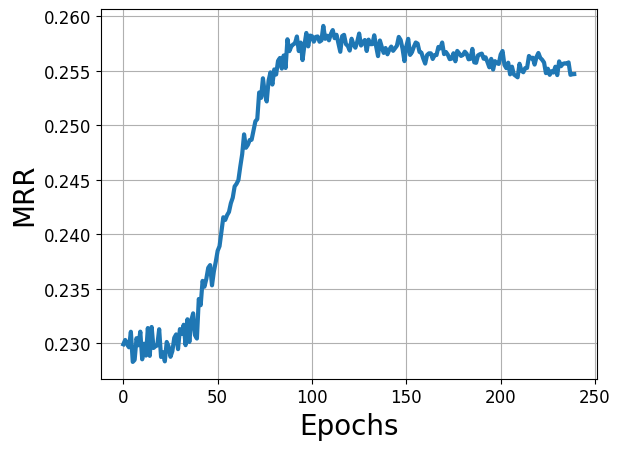

In [8]:


save_dir = 'figures/MF/full-training/'


l = get_list_of_content('results/mf-full-training.csv')
l = l[1:]
loss =  [float(i[-1]) for i in l]
hr =  [float(i[0]) for i in l]
ndcg =  [float(i[1]) for i in l]
mrr =  [float(i[2]) for i in l]
epochs = len(l)


metric_name = ['Loss', 'HR', 'NDCG', 'MRR']
y = [loss, hr, ndcg, mrr]


for i in range(4):
    plt.xlabel('Epochs')
    plt.ylabel(metric_name[i])
    plt.plot(y[i], linewidth=3)
    plt.grid()
    #plt.savefig(save_dir + str(metric_name[i]) + '.png', dpi = 150, bbox_inches="tight")
    plt.show()


# MLP Hyperparameters Visualization

#### 1) Archeticture effect

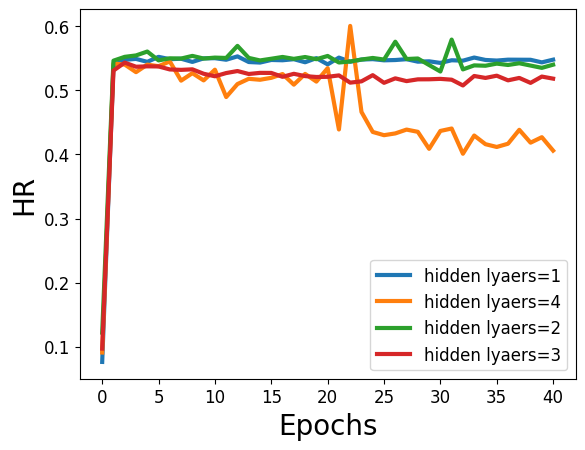

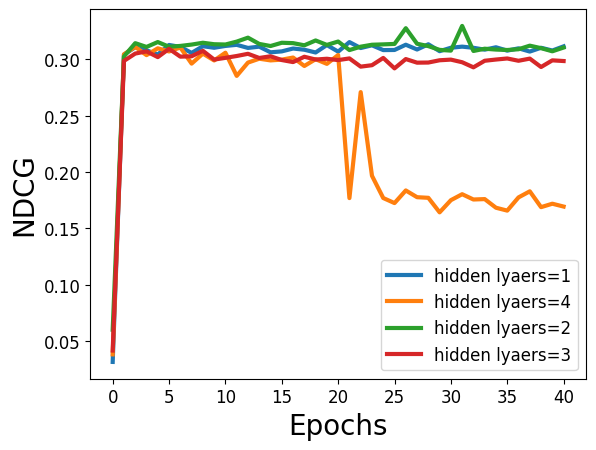

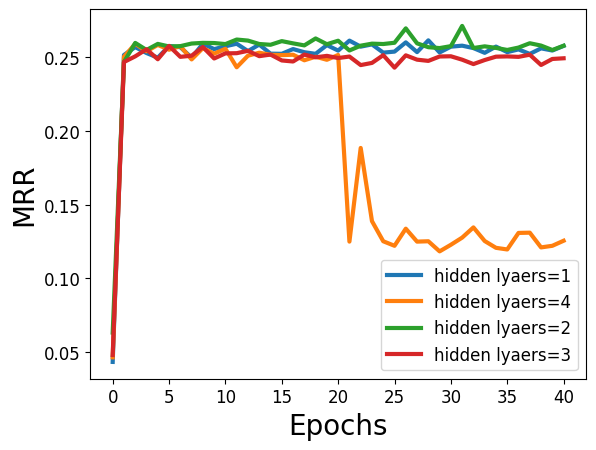

In [9]:


parent_dir = 'results/pre-study-mlp/arch/'
list_of_files = get_file_names_in_folder(parent_dir)

results = []

x = [*range(0,240,1)]

for csv_file in list_of_files:

    l = get_list_of_content(parent_dir + csv_file)
    params = l[0]
    l = l[1:]

    hr =  [float(i[0]) for i in l]
    ndcg =  [float(i[1]) for i in l]
    mrr =  [float(i[2]) for i in l]
    
    results.append([
        # number of hidden layers
        len(params[5].split(',')),
        hr,
        ndcg,
        mrr
    ])


metric = ['','HR', 'NDCG', 'MRR']
for i in range(1,4):
    

    for trial in results:


        plt.xlabel('Epochs')
        plt.ylabel(metric[i])
        plt.plot(x[0:len(trial[i])],trial[i], label='hidden lyaers=' + str(trial[0]), linewidth= 3 )
    
    plt.legend()
    #plt.figure(figsize=(9, 5))
    #plt.savefig('mlp-arch-'+ metric[i] +'.png', dpi=100, bbox_inches="tight")
    plt.show()



#### 2) Learning rate effect

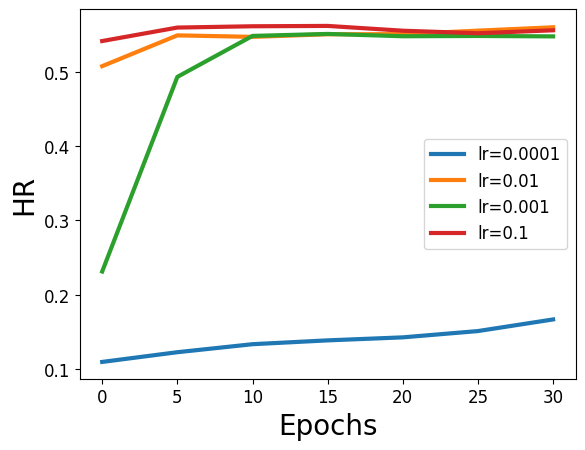

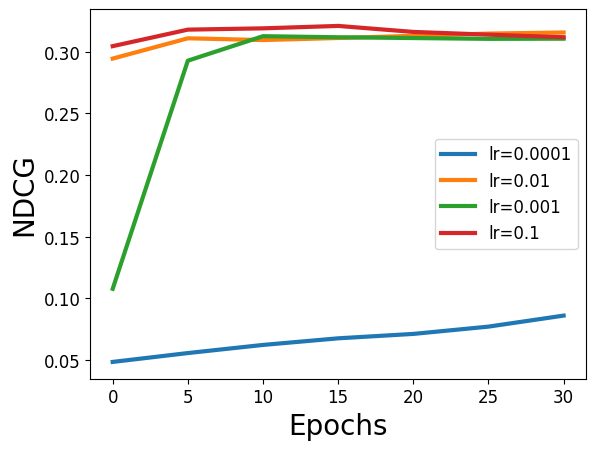

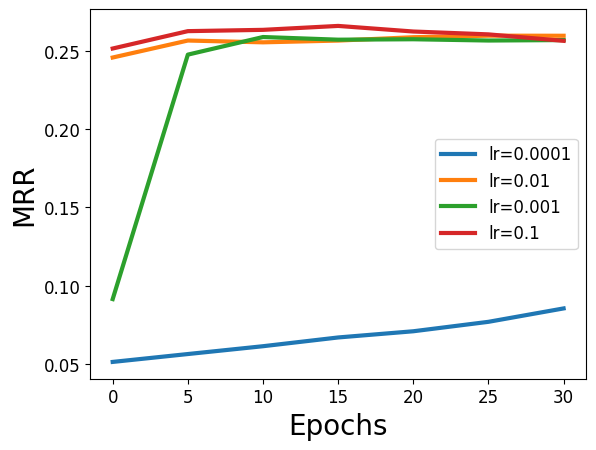

In [11]:


parent_dir = 'results/pre-study-mlp/lr/'
list_of_files = get_file_names_in_folder(parent_dir)

results = []
x = [*range(0,240,5)]

for csv_file in list_of_files:

    l = get_list_of_content(parent_dir + csv_file)
    params = l[0]
    l = l[1:]

    hr =  [float(i[0]) for i in l]
    ndcg =  [float(i[1]) for i in l]
    mrr =  [float(i[2]) for i in l]
    
    results.append([
        #learning rate parameter
        params[4],
        hr,
        ndcg,
        mrr
    ])


metric = ['','HR', 'NDCG', 'MRR']
for i in range(1,4):
    

    for trial in results:


        plt.xlabel('Epochs')
        plt.ylabel(metric[i])
        plt.plot(x[0:len(trial[i])],trial[i], label='lr=' + str(trial[0]), linewidth=3 )
    
    plt.legend()
    #plt.figure(figsize=(9, 5))
    #plt.savefig('mlp-lr-'+ metric[i] +'.png', dpi=100, bbox_inches="tight")
    plt.show()

    

# MLP- Full training graphs

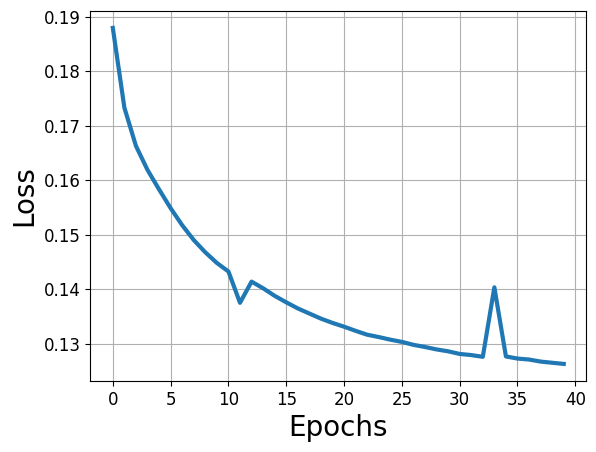

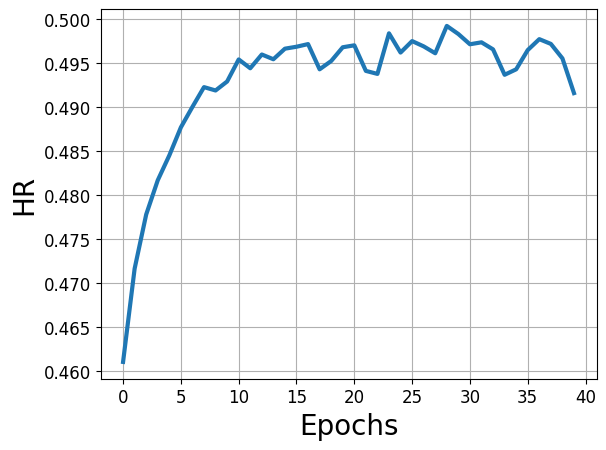

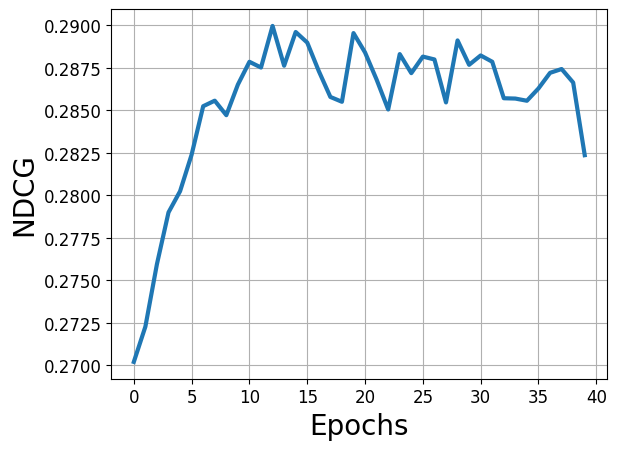

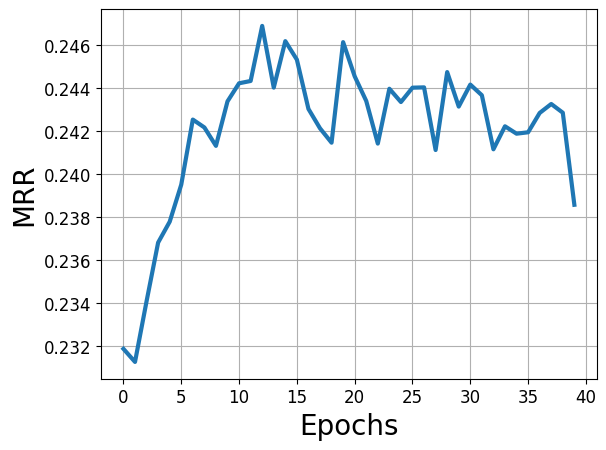

In [14]:
save_dir = 'figures/MLP/full-training/'


l = get_list_of_content('results/mlp-full-training.csv')
l = l[1:]
loss =  [float(i[-1]) for i in l]
hr =  [float(i[0]) for i in l]
ndcg =  [float(i[1]) for i in l]
mrr =  [float(i[2]) for i in l]
epochs = len(l)


metric_name = ['Loss', 'HR', 'NDCG', 'MRR']
y = [loss, hr, ndcg, mrr]


for i in range(4):
    plt.xlabel('Epochs')
    plt.ylabel(metric_name[i])
    plt.plot(y[i], linewidth=3)
    plt.grid()
    #plt.savefig(save_dir + str(metric_name[i]) + '.png', dpi = 150,  bbox_inches="tight")
    plt.show()